## 목표
- 붓꽃 꽃잎의 길이/너비 , 꽃받침의 길이/너비 특징을 활용해서 3가지 품종을 분류하는 모델을 만들어보쟈ㅏ.
- knn 모델의 이웃의 숫자를 조절해보자. (k개수를 조절, 하이퍼 파라미터 튜닝)

###  import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.metrics import accuracy_score # 정확도 측정
# train, test 분리하는 도구
from sklearn.model_selection import train_test_split

## .데이터 불러오기

In [2]:
from sklearn.datasets import load_iris # 붓꽃 데이터 불러오기

In [3]:
iris_data = load_iris()
iris_data

# 딕셔너리처럼 활용 가능
# sklearn.datasets -> 자료형태: bunch객체
# 딕셔너리 데이터 접근 : 인덱ㄷ싱 가능 x , 키값을 불러서 벨류에 접근
# 키값들만 확인
iris_data.keys()
# data : (필수) 문제 데이터, X, 독립변수, 설명번수, 피처(frature), 특성
# target: (필수) 답데이터, y, 종속변수, 결과, 실제적 닶, target
# frature_names : (옵션) 문제 데이터 이름 리스트(컬럼명 list)
# target_names : (옵션) 답 데이터 이름 리스트
# DESCR : (옵션) 자료에 대한 설명

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
# 문제 데이터 접근
# 크기 확인
# 위에서 5개 행만 출력(행 잘라내기, 슬라이싱) -->확인용
sh = iris_data['data'].shape #150개의 행 4개의 열
print(f'행: {sh[0]}, 열: {sh[1]}')
iris_data['data'][:5]

행: 150, 열: 4


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
# 특성(문제 데이터 컬러명) 이름 확인
iris_data.feature_names
iris_data['feature_names']
#['sepal length (cm)' 꽃받침의 길이
#'sepal width (cm)' 꽃받침의 너비
#'petal length (cm)', 꽃잎의 길이
# 'petal width (cm)', 꽃잎의 너비
# ]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
#답데이터  확인
iris_data.target
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
# 답데이터 이름 확인하기
iris_data.target_names
iris_data['target_names']

# ['setosa-0', 'versicolor-1', 'virginica-2']
iris_data.target_names[[0,2,2]]
# ->
iris_data.target_names[iris_data['target']]

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [8]:
# 설명 확인 
# DESCR
print(iris_data.DESCR) #\w때문에 프린트로 뽑아줌

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

## .데이터 정리
- 문제 데이터를 DF 형태로 변환(2차원)
- 문제 데이터와 답 데이터로 변수 정리(X, y)
- train, test분리 (train_test_split)
    * X_train, X_test, y_train, y_test

In [9]:
iris_data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data.feature_names)

In [11]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
X = iris_df
y = iris_data.target
print(X.shape, y.shape)

(150, 4) (150,)


##  .훈련 테스트 분리

In [13]:
X_train, X_test,y_train, y_test = ['훈련문제', '테스트문제', '훈련답', '테스트답']
print(X_train, X_test,y_train, y_test)

# unpacking 각각의 변수에 풀기

훈련문제 테스트문제 훈련답 테스트답


In [14]:
# 훈련, 테스트 분리
# 통상적으로 7:3 -> 비율 train의 크기 0.7 , test 는 0.3
#7.5:2.5
# 개수 의미로 넣어 줄려면 정수형태
# shuffle 섞는 기능 True
# train_test_split(문제 , 답 , 테스트 사이즈)
# random_state shuffle을 동일한 기준으로 실행
X_train, X_test,y_train, y_test= train_test_split(X, y, test_size = 0.25, random_state = 1 )
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
54,6.5,2.8,4.6,1.5
108,6.7,2.5,5.8,1.8
112,6.8,3.0,5.5,2.1
17,5.1,3.5,1.4,0.3
119,6.0,2.2,5.0,1.5
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [15]:
# 크기확인
print('훈련용 샛:', X_train.shape, y_train.shape)
print('테스트용 셋:', X_test.shape, y_test.shape)

훈련용 샛: (112, 4) (112,)
테스트용 셋: (38, 4) (38,)


In [16]:
#분리된 데이터 클래스 별 개수 확인하기
#7:3 비율 데이터 분리, 모델 입장에서 학습을 잘 하려면 다양한 데이터가 필요함
pd.Series(y_train).value_counts()
np.unique(y_train, return_counts= True)[1]/112

array([0.33035714, 0.30357143, 0.36607143])

## .데이터 탐색
- 특성간의 관계 확인
- 품종을 분리하기 위해서 어떤 특성이 도움이 될까?

In [17]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


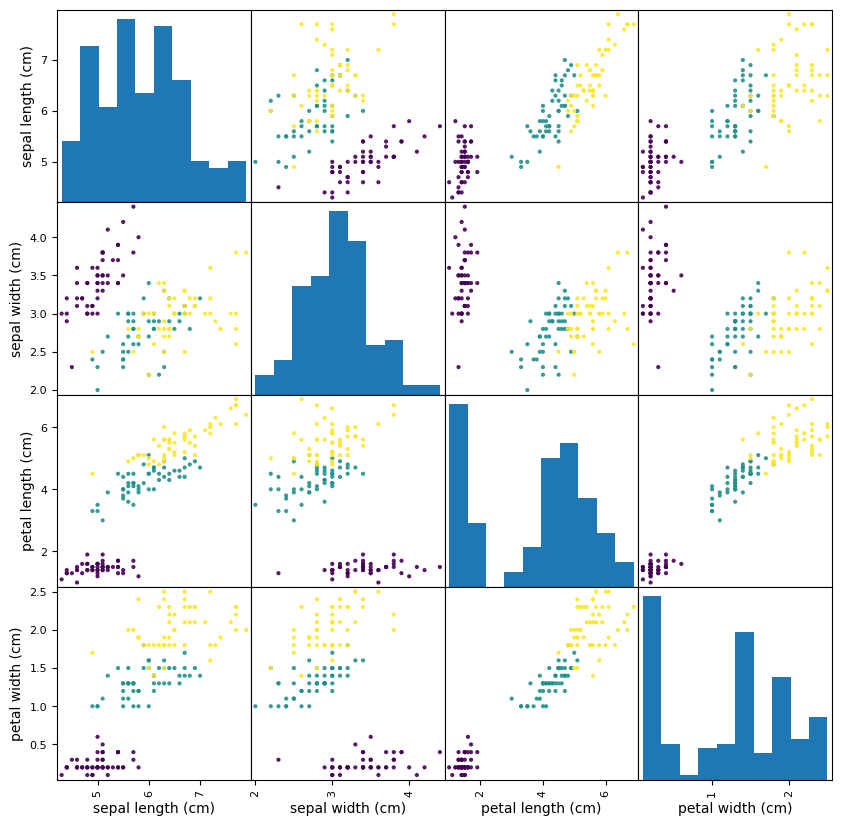

In [18]:
pd.plotting.scatter_matrix(iris_df, figsize=(10,10), c = y, alpha =0.9 )
plt.show()

## .모델링

In [19]:
# 모델 생성 이웃의 개수 5로 설정
# 모델링 iris_knn = 
iris_knn = KNeighborsClassifier(n_neighbors=5)

In [20]:
# 모델 학습
#모델.fit(트레인문제, 트레인 답)
iris_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
pre = iris_knn.predict(X_test)
pre

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0])

In [25]:
iris_data.target_names[pre]

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa'], dtype='<U10')

In [27]:
# 평가
accuracy_score(y_test, pre)
# 7:3 -> 97% 
# 7.5: 2.5 -> 100%
# 7.5 : 2.5로 분리한 데이터를 학습한 knn모델을 믿을 수 있는건가?
# 평가를 딱 한번만 했기때문에 , 모델이 새롭게 예측한 데이터는 1번이다.
# 여러번 교차검증이 필요하다.

1.0

##  하이퍼 파라미터
  * n_neigbors : 이웃 수를 여러번 바꿔보면서 모델의 성능을 확인해 보자
  
 
    

In [48]:
# 저장하는 빈 리스트 두개를 설정 (train 성능과, test 성능)

X_train, X_test,y_train, y_test= train_test_split(X, y, test_size = 0.3, random_state = 2 )
train_lst, test_lst = [], []  # train성능과 # 테스트 성능을 테스트
# 1에서 50까지 두칸 씩 뛰면서 k값을 세팅
n_setting = range(1, 50, 2) # 이웃의 수에 들어갈 값
for k in n_setting:
    # 모델생성
    knn_clf = KNeighborsClassifier(n_neighbors = k)
    # 모델 학습
    knn_clf.fit(X_train,y_train)
    # 모델 평가
    #train -> train_lst 저장
    train_pre = knn_clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pre)
    train_lst.append(train_acc)
    # train_lst.append(str(round((train_acc * 100),2))+"%")
    #test -> test_lst 저장
    test_pre = knn_clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pre)
    test_lst.append(test_acc)
    # test_lst.append(str(round((test_acc * 100),2))+"%")

In [49]:
print(*train_lst)

1.0 0.9428571428571428 0.9523809523809523 0.9619047619047619 0.9714285714285714 0.9714285714285714 0.9714285714285714 0.9619047619047619 0.9714285714285714 0.9619047619047619 0.9619047619047619 0.9714285714285714 0.9619047619047619 0.9619047619047619 0.9619047619047619 0.9523809523809523 0.9619047619047619 0.9523809523809523 0.9333333333333333 0.9428571428571428 0.9428571428571428 0.9333333333333333 0.9428571428571428 0.9428571428571428 0.9333333333333333


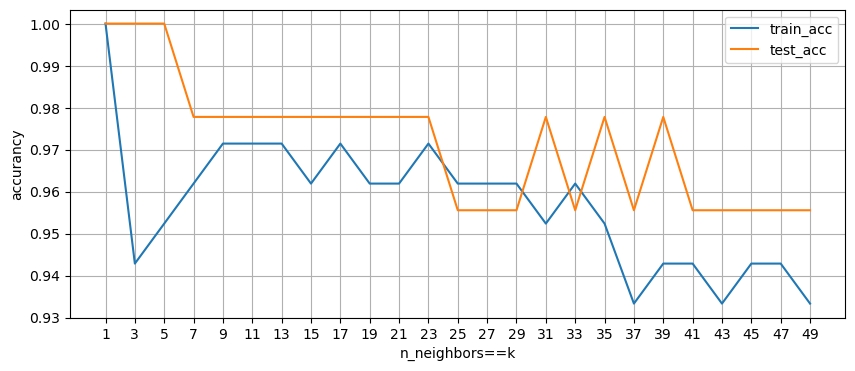

In [52]:
# k값이 달라짐에 따라 성능 추이 확인
# 선 그래프
# 하이퍼 파라미터 튜닝 결과 시각화
plt.figure(figsize=(10,4)) # 그래프 사이즈
plt.plot(n_setting, train_lst, label ='train_acc') # 범례이름, 값
plt.plot(n_setting, test_lst, label ='test_acc') # 범례이름, 값
plt.legend() # 범례 보이기 하기
plt.ylabel("accurancy") # 라벨링
plt.xlabel('n_neighbors==k') # 라벨링
plt.xticks(n_setting) #x축 간격
plt.grid() # grid 그리기
plt.show()

## .분석해보자

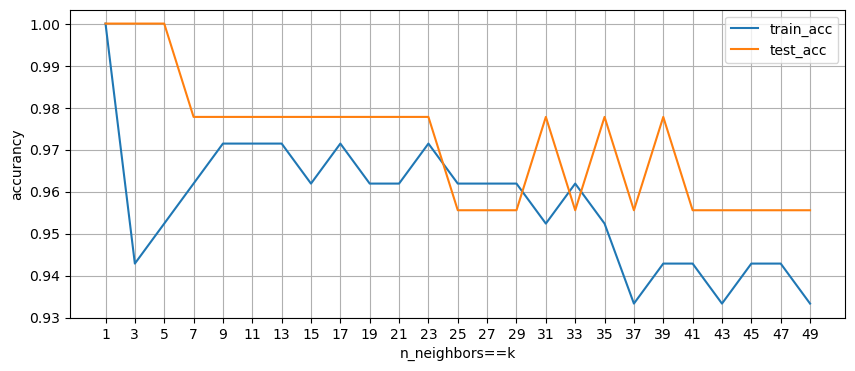
- k값이 커질 수록 성능이 떨어지고 있다. -> 점점 과소적합일 확률이 올라가고 있다.
- 학습용 데이터라서 모델이 학습하기에 , 예측하기에 쉬운 데이터 이다.
- 데이터에 대해서 여러번 검증해서 확인해 보아야 한다.


## .  교차검증

In [53]:
# iris_knn 모델 교차검증 진행
# 모델의 일반화 성능 확인
from sklearn.model_selection import cross_val_score

In [54]:
# 모델, 데이터, 몇번 검증
# cv: 데이터를 분리해서 검증하는 횟수
# cross_val_score(모델, train, cv = 횟수)
cross_val_score(iris_knn, X_train, y_train, cv = 5)
cross_val_score(iris_knn, X_train, y_train, cv = 5).mean()

0.9428571428571428

In [55]:
# k = 9
iris_knn9 = KNeighborsClassifier(n_neighbors=9)
print(cross_val_score(iris_knn9,X_train,y_train, cv=5).mean())
print('9 교차검증 평균:', cross_val_score(iris_knn9, X_train, y_train))

# k = 3
iris_knn3 = KNeighborsClassifier(n_neighbors = 3)
cross_val_score(iris_knn3, X_train, y_train, cv = 5).mean()

0.9619047619047618
9 교차검증 평균: [0.95238095 1.         1.         0.9047619  0.95238095]


0.9428571428571427